In [1]:
import pandas as pd

df = pd.read_json('frequent_itemsets.json')

In [2]:
df1 = df[(df['length']==1)].sort_values(by='support',ascending=False)[0:30]
df1
df1 = df1['itemsets']
itemlist = []
for row in list(df1):
    itemlist.append(row[0])
itemlist

['Machine Learning',
 'Neuroscience',
 'computer vision',
 'Artificial Intelligence',
 'Molecular Biology',
 'Microbiology',
 'Data Mining',
 'Biochemistry',
 'Cancer',
 'Deep Learning',
 'Condensed matter physics',
 'Immunology',
 'Robotics',
 'Bioinformatics',
 'Genetics',
 'climate change',
 'evolution',
 'Statistics',
 'Biophysics',
 'structural biology',
 'Data Science',
 'Ecology',
 'Computational Biology',
 'Distributed Systems',
 'Drug Discovery',
 'Optimization',
 'Genomics',
 'Biomedical Engineering',
 'health',
 'Race']

In [3]:
import pymysql
connect = pymysql.connect(
			host = 'localhost',
			db = 'GoogleScholars',
			user = 'root',
			passwd = '')
cur = connect.cursor()

cur.execute('''SELECT id, name from interests''')
iList = []
for row in cur:
    if str(row[1]) not in itemlist: continue
    iList.append(int(row[0]))


In [4]:
cur.execute('''SELECT DISTINCT Aid, name, Iid
				FROM authors_to_interests 
				INNER JOIN authors 
				on authors_to_interests.Aid = authors.id
				WHERE Iid != 18''')
index = []
mydict = dict()
for row in cur:
    if int(row[2]) not in iList: continue # only include authors with interests in frequent_itemsets
    if str(row[1]) not in index:
        index.append(str(row[1]))
        mydict[str(row[1])] = []
    mydict[str(row[1])].append(int(row[2]))    

In [54]:
df2 = pd.DataFrame(index=index, columns=iList)
df2 = df2.fillna(0)
for (k,v) in mydict.items():
    df2.loc[[k],v] = 1
df2

,12,13,15,20,38,40,43,44,46,50,...,615,624,629,630,717,804,850,869,1224,1657
Peter Meer,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tomasz imielinski,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Stephen K. Burley, M.D., D.Phil.",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Peter Smouse,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sang-Wook Cheong,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Darrin M. York,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Dimitris N. Metaxas,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Steven R Brant,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
David Vanderbilt,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(df2)


print(pca.explained_variance_)  

[0.19578987 0.11113934 0.07057706 0.06710402 0.05170358 0.05041697
 0.04611461 0.04534071 0.04069933 0.03984541 0.03723708 0.03617589
 0.03324833 0.03290693 0.03096412 0.0304876  0.02897169 0.02837713
 0.02740866 0.02649233 0.02618591 0.02525177 0.02390894 0.02309597
 0.02237522 0.02231658 0.02111364 0.02067351 0.01954669 0.00704759]


In [17]:
pca.n_components = 2
df2_reduced = pca.fit_transform(df2)
df2_reduced.shape

(582, 2)

In [18]:
df2_reduced

array([[ 0.19632316, -0.04504076],
       [-0.08215311, -0.1475864 ],
       [-0.18027338, -0.16511299],
       ...,
       [-0.22139071, -0.16672693],
       [-0.20183287, -0.23957056],
       [-0.21047529, -0.25485209]])

In [117]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
df2['class'] = cluster.fit_predict(df2_reduced)
df2['class'].replace([0,1,2,3,4],['miscellaneous','Machine Learning + Computer Vision','Neuroscience','Computer Vision + Robotics/Deep Learning','Machine Learning'], inplace=True)
df2


,12,13,15,20,38,40,43,44,46,50,...,624,629,630,717,804,850,869,1224,1657,class
Peter Meer,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Vision + Robotics/Deep Learning
tomasz imielinski,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
"Stephen K. Burley, M.D., D.Phil.",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
Peter Smouse,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
Sang-Wook Cheong,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Darrin M. York,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,miscellaneous
Dimitris N. Metaxas,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Machine Learning + Computer Vision
Steven R Brant,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
David Vanderbilt,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous


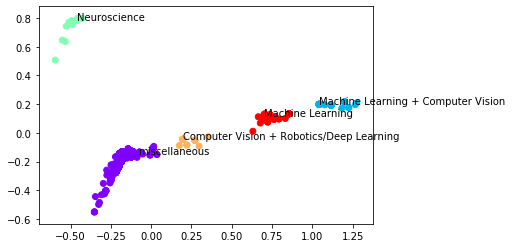

In [173]:
plt.scatter(df2_reduced[:,0],df2_reduced[:,1], c=cluster.labels_, cmap='rainbow')
temp_labels = []
labelDict = {0:'miscellaneous',1:'Machine Learning + Computer Vision',2:'Neuroscience',3:'Computer Vision + Robotics/Deep Learning', 4:'Machine Learning'}
# count = 0
for name, label, x, y in zip(index, cluster.labels_, df2_reduced[:, 0], df2_reduced[:, 1]):
# #     if count < 50:
# #         count = count + 1
# #         continue
    if (label not in temp_labels) and (len(temp_labels) < 5) :
        plt.annotate(
#             name,
#             label,
            labelDict.get(label),
            xy=(x, y))
        temp_labels.append(label)
#     if len(temp_labels) == 5: break


In [200]:

scholarDict = dict()
scholarDict['miscellaneous'] = list(df2[df2['class'] == 'miscellaneous'].head().index)
scholarDict['Neuroscience'] = list(df2[df2['class'] == 'Neuroscience'].head().index)
scholarDict['Machine Learning'] = list(df2[df2['class'] == 'Machine Learning'].head().index)
scholarDict['Machine Learning + Computer Vision'] = list(df2[df2['class'] == 'Machine Learning + Computer Vision'].head().index)
scholarDict['Computer Vision + Robotics/Deep Learning'] = list(df2[df2['class'] == 'Computer Vision + Robotics/Deep Learning'].head().index)

{'newone': ['Computer Vision + Robotics/Deep Learning',
  ['Peter Meer', 'Ayman Saleh', 'Yunhe Gao']],
 'newtwo': ['miscellaneous',
  ['tomasz imielinski', 'Stephen K. Burley, M.D., D.Phil.', 'Peter Smouse']],
 'newthree': ['miscellaneous',
  ['Sang-Wook Cheong', 'Peter Smouse', 'Rohit Aita']]}

In [120]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, 30].values

# split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# featuure scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# trainning and predicting
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  0  0  0  2]
 [ 0 16  0  0  3]
 [ 0  3  5  0  0]
 [ 0  0  0 11  3]
 [ 0  0  0  0 70]]
                                          precision    recall  f1-score   support

Computer Vision + Robotics/Deep Learning       1.00      0.67      0.80         6
                        Machine Learning       0.84      0.84      0.84        19
      Machine Learning + Computer Vision       1.00      0.62      0.77         8
                            Neuroscience       1.00      0.79      0.88        14
                           miscellaneous       0.90      1.00      0.95        70

                                accuracy                           0.91       117
                               macro avg       0.95      0.78      0.85       117
                            weighted avg       0.91      0.91      0.90       117



In [195]:
df2

,12,13,15,20,38,40,43,44,46,50,...,624,629,630,717,804,850,869,1224,1657,class
Peter Meer,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Computer Vision + Robotics/Deep Learning
tomasz imielinski,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
"Stephen K. Burley, M.D., D.Phil.",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
Peter Smouse,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
Sang-Wook Cheong,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
David Vanderbilt,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,miscellaneous
masayori inouye,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,miscellaneous
newone,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unknown
newtwo,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,unknown


In [196]:
# my prediction test case
df2.loc['newone'] = [0]*30 + ['unknown']
df2.loc['newone',12] = 1
df2.loc['newtwo'] = [0]*30 + ['unknown']
df2.loc['newtwo',13] = 1
df2.loc['newtwo',43] = 1
df2.loc['newthree'] = [0]*30 + ['unknown']
df2.loc['newthree',46] = 1
df2.loc['newthree',40] = 1

my_test = df2.iloc[len(df2)-3:len(df2), :-1].values
# a_test
my_test = scaler.transform(my_test)
classifier.predict(my_test)

array(['Computer Vision + Robotics/Deep Learning', 'miscellaneous',
       'miscellaneous'], dtype=object)